# Aufgabe 03

In [57]:
# Install dependencies
!pip install networkx pygraphviz matplotlib

In [58]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import to_agraph
from IPython.display import Image

prefix = "aufgabe_03"

## Create the graph

In [59]:
edges = [(1, 2), (2, 3), (3, 4), (2, 4), (2, 5), (5, 6), (5, 7), (7, 8), (6, 8), (6, 1)]

# Step 1: Create a graph
g = nx.Graph()
g.add_edges_from(edges)

# Step 2: Convert to AGraph (Graphviz graph)
a = to_agraph(g)

## Find all walks in the graph

In [60]:
ways = list(nx.all_simple_paths(g, source=1, target=8))

# Visualize the results

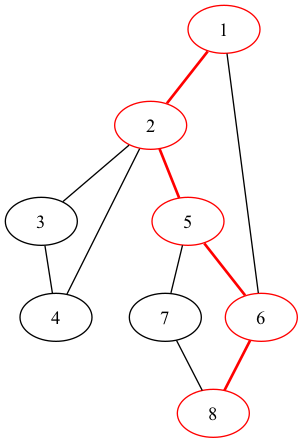

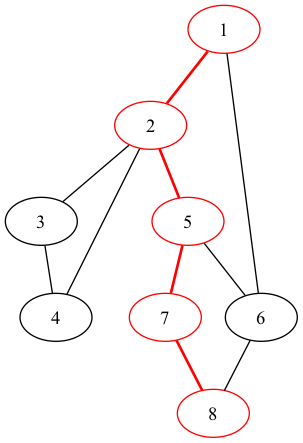

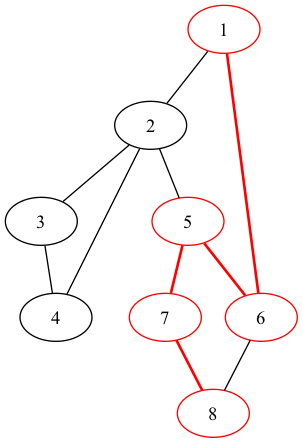

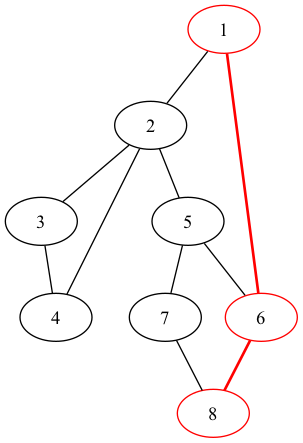

In [61]:
for idx, way in enumerate(ways, 1):
    # Create a new AGraph from the NetworkX graph
    a = to_agraph(g)

    # Default style for all edges
    for edge in a.edges():
        edge.attr['color'] = 'black'
        edge.attr['style'] = 'solid'

    # Highlight the edges in the path
    path_edges = list(zip(way[:-1], way[1:]))
    for edge in path_edges:
        if a.has_edge(edge[0], edge[1]):
            a.get_edge(edge[0], edge[1]).attr['color'] = 'red'
            a.get_edge(edge[0], edge[1]).attr['style'] = 'bold'
        for i in range(0, len(edge)):
            if a.has_node(edge[i]):
                a.get_node(edge[i]).attr['color'] = 'red'

    # Draw the graph with highlighted path
    a.layout(prog='dot')  # Use dot algo for layout
    png_path = f'assets/{prefix}_graph_path_{way[0]}_to_{way[-1]}_{idx}.png'
    a.draw(png_path)
    display(Image(filename=png_path))
